# 十大模型效能指標  
```
通用 :
1.混淆矩陣 : TP（真陽性）、TN（真陰性）、 FP（假陽性）、FN（假陰性）
2.第1類錯誤 : 也稱為假陽性（false positive），目標:減少第1類錯誤
3.第2類錯誤 : 也稱為假陰性（false negative），目標:減少第2類錯誤

類別標籤 :

平衡資料集 :

4.準確度(Accuracy) : (TP+TN)/總人數，兩個類別標籤比率出現偏差時，模型將偏向其中一個類別

不平衡資料集 :

5.召回率(Recall)/靈敏度/真陽性率(TPR) : TP/P = TP/(TP+FN) = 1-FNR，正確識別實際陽性的比例
                                      真實檢測極為重要的用例，假陰性被最小化 = 召回率最大化  
                                      
6.精度(Precision) : PPV = TP/(TP+FP)，陽性結果的正確比例，要求沒有大量誤報的用例

7.特異性(Specificity)/真陰性率(TNR) : TN/N = TN/(TN+FP) = 1-FPR，正確識別實際陰性的比例

8.F1分數 : 2/(inv(recall)+inv(precision)) = 2*(precision*recall)/(precision+recall)

機率 : 

9.ROC曲線-AUC值 : 通過為分類模型分配不同的閾值建立不同的資料點用以生成ROC曲線，x軸 1-特異性（假陽性率），y軸靈敏度（真陽性率）
                  接收操作特性曲線（ROC）: 曲線告訴我們模型對兩件事物的區分能力有多強
                                         ROC曲線離中線越遠，模型越好
                  曲線下面積（AUC）: ROC曲線下的面積稱為AUC。AUC越大，模型越好
```
**如果資料大部分位於負標籤上，那麼ROC-AUC的結果將無法過多地代表現實<br>
(主要關注的是陽性率方法，即y軸上的真陽性率和x軸上的假陽性率)**
```
10.PR曲線 : 精度-召回率曲線，X軸召回率(真陽性率)，Y軸精度
```
來源:https://www.gushiciku.cn/pl/pygL/zh-tw



- **了解評分指標，如何有效率提升指標分數**

- 檢查資料是否存在缺失值 (missing map)
```
   畫 percentage of missing values
```
- 觀察每一個特徵的分配，目標類別是否有不平衡?


- 處理目標不平衡 : https://lufor129.medium.com/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E4%B8%80-%E8%99%95%E7%90%86%E4%B8%8D%E5%B9%B3%E8%A1%A1%E8%B3%87%E6%96%99%E5%B9%BE%E7%A8%AE%E6%96%B9%E6%B3%95-39c25d06a6cb

```
   類標籤場合可以進一步劃分為平衡或不平衡資料集的情況，
   這兩種情況都不應該基於相似的指標進行判斷。
   某些指標更適用於其一而不適用於另一種情況。
   同樣，概率方案的模型效能指標也不同於類標籤方案。
```   
- 觀察每一個特徵的統計性質 (最大、小、中位數、標準差、平均值、range 等等)

- 做你能想到可以了解資料的圖表 (heatmap、kdeplot 等等)

- 想想資料怎麼處理 (normalize or other ways?)

```
   對數轉換 (資料不能有0或負數) np.log(df['f1'])
   平方根轉換 (資料不能是負數)  df['f1']**(1/2)
   立方根轉換                  df['f1']**(1/3)
   次方轉換 (只能處理左偏)      np.power(df['f1'], 2)
   Box-Cox 轉換
    
    from scipy.stats import boxcox
    transform_data, lam = boxcox(boston['LSTAT'])
    transform_data = pd.DataFrame(transform_data, columns=['LSTAT'])['LSTAT']
    # skewness 與 kurtosis
    skewness = round(transform_data.skew(), 2)
    kurtosis = round(transform_data.kurt(), 2)
    print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

    # 繪製分布圖
    sns.histplot(transform_data, kde=True)
    plt.show()
   
   移除離群值
   
    # 將所有特徵超出1.5倍IQR的概念將這些Outlier先去掉，避免對Model造成影響。
    print ("Shape Of The Before Ouliers: ",boston['LSTAT'].shape)
    n=1.5
    #IQR = Q3-Q1
    IQR = np.percentile(boston['LSTAT'],75) - np.percentile(boston['LSTAT'],25)
    # outlier = Q3 + n*IQR 
    transform_data=boston[boston['LSTAT' < np.percentile(boston['LSTAT'],75)+n*IQR]
    # outlier = Q1 - n*IQR 
    transform_data=transform_data[transform_data['LSTAT'] > np.percentile(transform_data['LSTAT'],25)-n*IQR]['LSTAT']
    print ("Shape Of The After Ouliers: ",transform_data.shape)

```

- 想想可以新增哪些特徵?

- 決定如何分配訓練、驗證，或是 KFOLD (你們要統一)





# df 
- pandas可處理的物件 : DataFrame
- pandas 版的 Excel 試算表

df = df.apply(pd.to_numeric,errors='coerce')
- 將不正確或不能算的資料 強制 轉成 數值 或 NAN
- 如果有不能算的數值 .describe()就不會顯示 圖也會跟著少
- 可用pandas的功能整理非數值,或者先將報表轉為Excel模式,清理過後再匯入

**kstest方法:KS检验,参数分别是:待检验的数据,检验方法(这里设置成norm正态分布),均值与标准差<br>
结果返回两个值: statistic + D值, pvalue + P值<br>
p值大于0.05,为正态分布<br> 
H0:样本符合<br>
H1:样本不符合<br>
如p>0.05接受H0,反之**<br>
```
from scipy import stats    # 檢驗數據是否服從正態分佈
df1 = df.fillna(0)

u = np.zeros(118)
std = np.zeros(118)
```
**K-S檢定（Kolmogorov-Smirnov test）:檢定兩個經驗分布是否不同或一個經驗分布與另一個理想分布是否不同**<br>
**一致的假設檢驗，當樣本量足夠大時，會出現非常小的 p 值和較小的效應量**<br>
```
for i in df1:
    df1.mean()[i]
    df1.std()[i]
    ks = stats.kstest(df1[i],"norm",(df1.mean()[i],df1.std()[i]))
    print(ks)
```

**看變數分布**
- sns.displot( df [ 'f1' ] ,bins=50,kde=True )
- sns.kdeplot( df [ 'f1' ] )
- sns.histplot(transform_data, kde=True)

- plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv(r'C:\Users\user\Desktop\2022data\train.csv',index_col='id')

#路徑字串開頭要寫 r & 檔案名稱.csv                         
# r :為了不讓 \ 被讀成特殊字元 EX: \n
#指定欄位 id 為索引 (取代原本 0.1...957918的位置)

df #漂亮的形式

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
id,,,,,,,,,,,,,,,,,,,,,
0,0.108590,0.004314,-37.566,0.017364,0.289150,-10.25100,135.12,168900.0,3.992400e+14,86.489,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.10,1.01770,1
1,0.100900,0.299610,11822.000,0.276500,0.459700,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.00,0.28359,0
2,0.178030,-0.006980,907.270,0.272140,0.459480,0.17327,2298.00,360650.0,1.224500e+13,15827.000,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.20,0.40690,1
3,0.152360,0.007259,780.100,0.025179,0.519470,7.49140,112.51,259490.0,7.781400e+13,-36.837,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.10,0.51486,1
4,0.116230,0.502900,-109.150,0.297910,0.344900,-0.40932,2538.90,65332.0,1.907200e+15,144.120,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957914,0.098979,0.202530,2192.100,0.348010,0.276430,-0.84065,2214.20,26246.0,1.061600e+15,10882.000,...,-51.2970,1.7323,20.76300,14.74400,27415.00,1.2160,2.139400e+13,2612.00,0.42597,0
957915,0.134930,0.413600,1050.100,0.000521,-0.001246,1.76990,3519.90,862290.0,7.321400e+13,2869.000,...,-41.4180,2.6986,-1.09760,-1.09980,13826.00,1.3320,1.829400e+17,3300.50,0.92974,1
957916,0.104660,0.473510,2415.400,0.252230,0.196970,-0.82323,3044.90,13832.0,2.693300e+12,2294.700,...,-15.9670,1.6843,1.07590,16.64600,8655.10,1.1113,1.925800e+16,297.61,0.91446,0


In [13]:
df.isna().sum().sum()                  # df.isnull().sum().sum() # 1820782

df.isna().sum().sum() / (len(df)*118)  # 全部缺失值的比例         # 113034442

0.01610820532028636

In [6]:
(df['f2']>203).sum()

0

In [48]:
# 顧客缺失值數

n = pd.concat((df.reset_index().loc[:,'id'], df.isna().sum(axis=1)), axis = 'columns')
n


,id,0
0,0,1
1,1,0
2,2,5
3,3,2
4,4,8
...,...,...
957914,957914,0
957915,957915,4
957916,957916,0
957917,957917,1


<AxesSubplot:ylabel='id'>

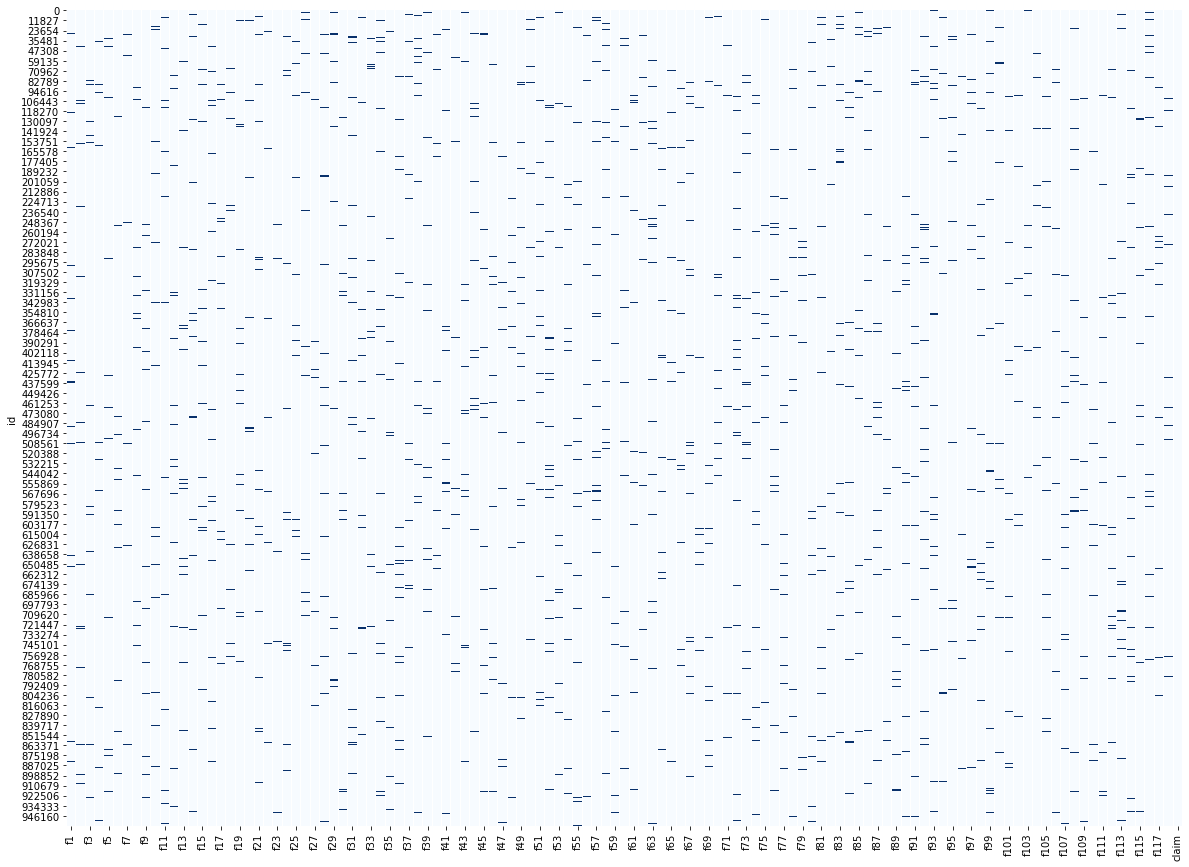

In [3]:
# 檢查資料是否存在缺失值 (missing map)
# df.isnull().sum().sum() # 有缺失值嗎
# df.isna()  # TRUE、FALSE 表格

plt.figure(figsize=(20,15))
sns.heatmap(df.isna(), linewidths = 0, cmap='Blues', cbar=False) # cbar，可選是否繪製顏色條


<AxesSubplot:xlabel='index', ylabel='0'>

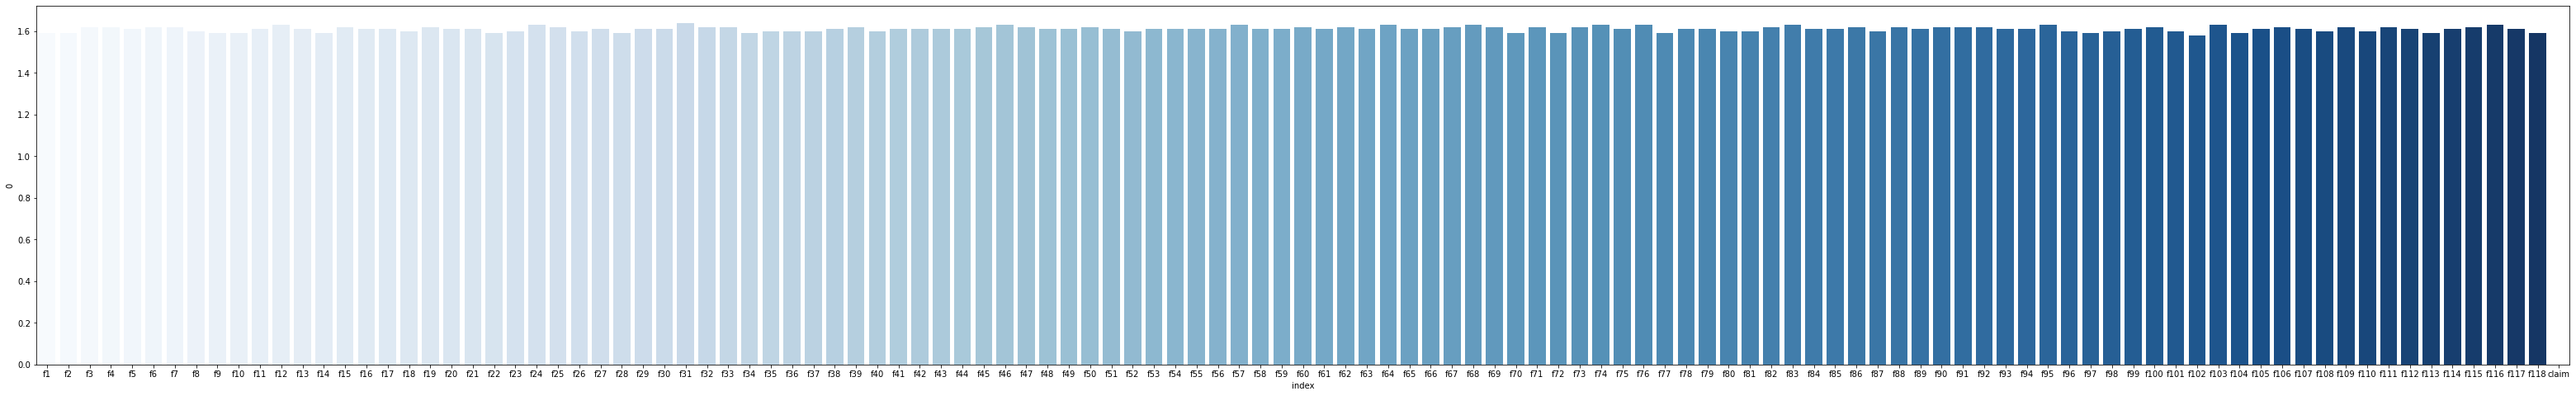

In [9]:
# percentage of missing values

percent = 100*(df.isnull().sum()) / len(df.index)
percent = round(percent,2)
percent = percent.reset_index() #讓index重置成原本的樣子

plt.figure(figsize=(55,8))
sns.barplot(data=percent, x = 'index', y = 0, palette = 'Blues')

# palette 調色盤

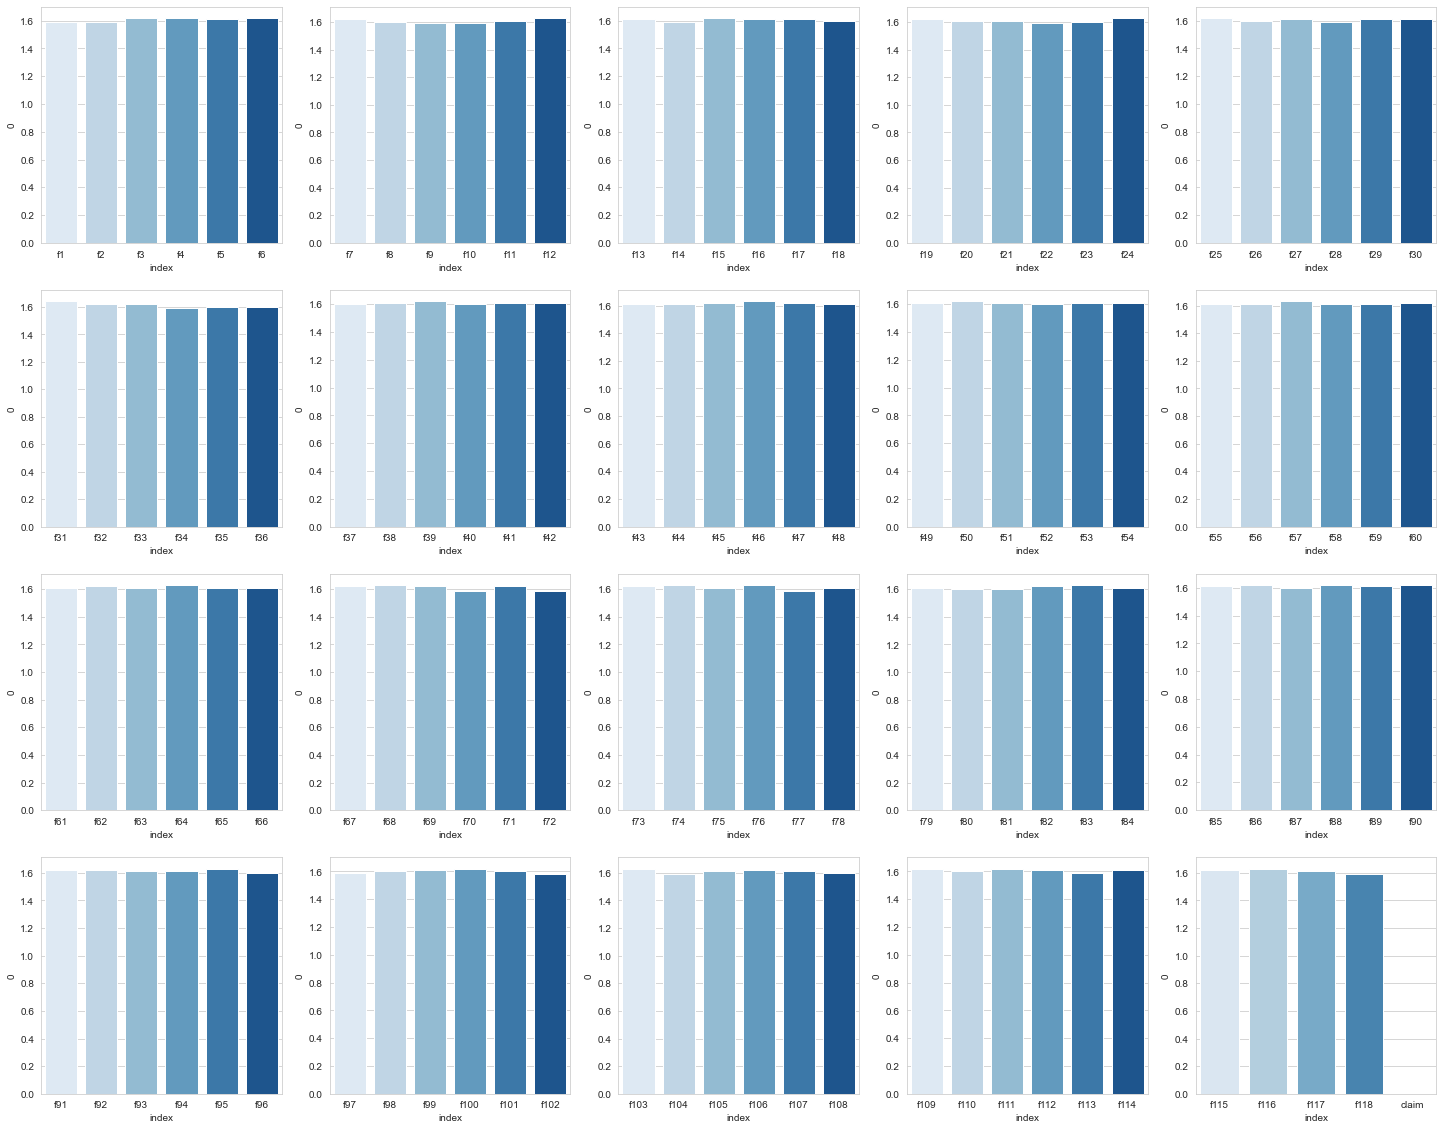

In [28]:
# percentage of missing values

percent = 100*(df.isnull().sum()) / len(df.index)
percent = round(percent,2)
percent = percent.reset_index() #讓index重置成原本的樣子

# percentage of missing values

NROW=4
NCOL=5

j=0
sns.set_style("whitegrid")
fig, ax = plt.subplots(NROW, NCOL, figsize = (25,20))
for row in range(NROW):
    for col in range(NCOL):
        sns.barplot(x = 'index',y = 0 ,data=percent.iloc[j:j+6,:], ax = ax[row, col], palette = 'Blues')
        j=j+6
#palette 調色盤


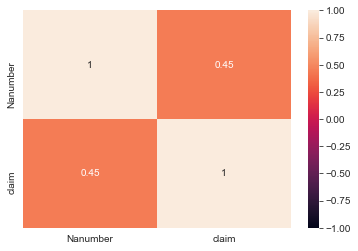

In [5]:
# na_number.loc[:,('Nanumber','claim')].corr()                   # 缺失值跟 claim 的相關係數

na_number = pd.concat((df.loc[:,'f1':'f118'], df.isna().sum(axis=1), df['claim']), axis = 'columns')
na_number = na_number.rename(columns={ 0 :'Nanumber'})           # 用 NaN 數量創新 column

sns.heatmap(na_number.loc[:,('Nanumber','claim')].corr(), annot=True, vmin=-1, vmax=1) 
#熱圖(heat map) 
#相關矩陣當資料、將數字資料顯示在圖上、給範圍 (必打最大最小值)，否則變邊界最大最小值
plt.show()

<AxesSubplot:xlabel='claim', ylabel='count'>

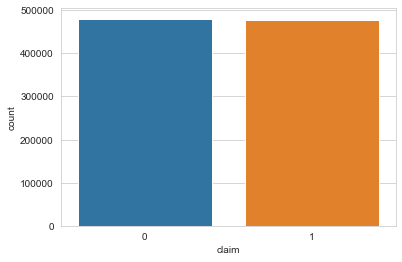

In [6]:
# 觀察每一個特徵的分配，目標類別是否有不平衡

sns.countplot(x = 'claim',data=df.loc[:,['claim']])

# claim沒加[]只會有值(Series)，x軸抓不到(用 DataFrame)
# df.reset_index().loc[:,['id','claim']]  
# df.reset_index().iloc[:,[0,119]]

In [7]:
#觀察每一個特徵的統計性質 (最大、小、中位數、標準差、平均值、range 等等)

df.describe(include='all').loc[:, 'f1':'f20'].style.background_gradient('Blues')

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
count,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,942546.000000,942670.000000,942696.000000,942494.000000,942326.000000,942455.000000,942697.000000,942410.000000,942475.000000,942492.000000,942594.000000,942445.000000,942464.000000
mean,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,377164.164157,1806053749440377.750000,5323.442367,0.729518,1844435560.081402,0.247759,6.999152,0.019394,444.804439,6.892520,4.491982,22.448660,203.782031
std,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,345432.472849,2335204188640509.000000,10068.380032,1.495535,2125477558.021488,0.101156,6.621472,0.101880,631.327086,1.715735,3.899241,14.609968,281.015052
min,-0.149910,-0.019044,-9421.700000,-0.082122,-0.006990,-12.791000,-224.800000,-29843.000000,-1153300000000000.000000,-26404.000000,-8.086300,-408100000.000000,-0.103800,-0.853760,-0.335660,-116.880000,-3.664500,-0.066527,-4.422500,-58.834000
25%,0.070227,0.283050,418.430000,0.035086,0.240520,-1.120700,481.545000,91209.000000,11531000000000.000000,75.876750,0.222002,44813000.000000,0.221880,1.456000,-0.035655,10.606000,5.961700,1.045600,11.450000,5.455675
50%,0.090135,0.389100,1279.500000,0.137000,0.327790,-0.380110,1446.100000,289670.000000,504305000000000.000000,1073.200000,1.179100,917240000.000000,0.276060,5.324900,0.010509,88.898000,6.795600,3.963100,19.870000,45.019000
75%,0.116500,0.458450,4444.400000,0.297100,0.412830,0.921940,2495.900000,560560.000000,3103100000000000.000000,5693.200000,1.508500,3485900000.000000,0.309840,10.738000,0.066116,693.880000,7.543000,6.495500,32.323000,309.720000
max,0.415170,0.518990,39544.000000,1.319900,0.554750,11.202000,5426.600000,1913700.000000,10424000000000000.000000,85622.000000,8.650500,8473600000.000000,0.589770,36.951000,0.509630,2335.400000,19.189000,25.458000,80.154000,1032.200000


In [8]:
df.describe(include='all').loc[:, 'f21':'f40'].style.background_gradient('Blues')

,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
count,942465.000000,942641.000000,942563.000000,942289.000000,942413.000000,942561.000000,942475.000000,942654.000000,942504.000000,942527.000000,942241.000000,942390.000000,942427.000000,942671.000000,942585.000000,942556.000000,942607.000000,942485.000000,942360.000000,942551.000000
mean,61070.567499,2.269597,87.166891,0.341240,414.983986,3379987643255.859863,1254164236339.915283,2256887.491631,0.329054,7.882455,0.394211,134469.988473,357905.544068,-0.000005,27823178865941924.000000,185.485192,406.072571,1.768743,1981.074344,0.359381
std,89859.616863,0.896001,37.350264,1.643595,314.822410,5655523939854.593750,1642736110554.133789,2303909.489554,0.433861,5.939864,0.781932,203660.525285,462667.049745,0.001534,34527073956544216.000000,701.769083,314.708639,0.588984,1958.688237,0.441752
min,-84079.000000,-6.009400,-20.514000,-5.735200,-71.502000,-695670000000.000000,-938420000000.000000,-470600.000000,-0.005659,-0.529990,-3.813500,-349650.000000,-605590.000000,-0.003881,-20689000000000000.000000,-2414.300000,-40.881000,0.546100,-433.700000,-0.007641
25%,2560.600000,1.861200,76.075000,-0.811150,126.250000,22559000000.000000,28975500000.000000,149520.000000,0.001522,3.096200,-0.014588,11451.000000,41076.000000,-0.001176,224090000000000.000000,-104.500000,117.000000,1.408400,412.470000,0.003012
50%,18969.000000,2.286800,96.512000,1.091200,370.900000,799210000000.000000,318680000000.000000,1551900.000000,0.078630,6.831400,0.656300,50088.000000,171350.000000,-0.000009,9685500000000000.000000,46.006000,356.970000,1.553900,1403.300000,0.086054
75%,83406.000000,2.691100,111.320000,1.245400,673.750000,3959000000000.000000,2130800000000.000000,4030900.000000,0.899340,10.943000,0.940020,172430.000000,522970.000000,0.001161,49695000000000000.000000,216.620000,664.270000,1.983500,2943.100000,0.905040
max,523590.000000,11.306000,160.450000,6.960000,1220.800000,25805000000000.000000,5447100000000.000000,8960600.000000,1.095800,36.744000,3.753100,1154000.000000,2873200.000000,0.003919,159050000000000000.000000,3728.500000,1218.000000,4.084000,11195.000000,1.043500


In [9]:
df.describe(include='all').loc[:, 'f41':'f60'].style.background_gradient('Blues')

,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
count,942523.000000,942503.000000,942464.000000,942456.000000,942436.000000,942286.000000,942396.000000,942473.000000,942539.000000,942357.000000,942487.000000,942604.000000,942457.000000,942494.000000,942497.000000,942452.000000,942346.000000,942464.000000,942519.000000,942359.000000
mean,446.664352,0.359571,6.946628,29.761954,0.013454,4.277615,0.029221,6.378937,-0.425397,0.299912,56.638828,2683.140670,12.204214,137.373234,0.250631,0.411071,0.000012,-0.329313,3.058053,0.548762
std,620.581881,0.407419,1.831970,28.776654,0.014658,1.139983,0.676841,2.107511,0.729078,0.146104,88.181507,2525.289159,21.651584,16.041827,0.110021,0.323768,0.001520,0.281456,1.734140,0.268437
min,-107.380000,-0.057710,-4.421400,-8.189200,-0.010260,-3.561500,-2.617200,1.056400,-1.730600,-0.006924,-131.950000,-721.610000,-26.637000,98.868000,-0.033956,-0.052052,-0.003899,-1.179000,0.683640,-0.150990
25%,12.010000,0.006689,5.888500,6.845575,0.001982,4.001200,-0.554970,5.027500,-0.999420,0.230720,3.863550,642.425000,-0.198270,125.010000,0.202290,0.092032,-0.001136,-0.410240,1.774100,0.370200
50%,115.430000,0.095807,6.750300,21.036000,0.008313,4.292300,0.143230,6.100900,-0.718660,0.323830,18.403000,2002.700000,2.232600,133.670000,0.268290,0.388570,0.000010,-0.235250,2.467600,0.601050
75%,668.510000,0.895860,7.760600,44.262000,0.022372,4.650700,0.585300,7.417400,0.025370,0.410500,71.787500,3946.800000,14.658000,151.580000,0.327900,0.711990,0.001163,-0.137950,3.903150,0.774930
max,2335.400000,1.028700,19.978000,180.970000,0.066794,10.066000,3.015300,16.870000,1.799000,0.548320,503.170000,14553.000000,131.750000,175.160000,0.496070,1.186600,0.003906,0.071947,7.734600,1.014100


In [10]:
df.describe(include='all').loc[:, 'f61':'f80'].style.background_gradient('Blues')

,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80
count,942488.000000,942401.000000,942509.000000,942341.000000,942505.000000,942505.000000,942433.000000,942300.000000,942367.000000,942657.000000,942437.000000,942700.000000,942382.000000,942349.000000,942463.000000,942350.000000,942668.000000,942470.000000,942541.000000,942599.000000
mean,0.273404,2469246893.886226,36.836014,0.212860,47835.926728,84.103569,608.154443,29.001846,1.212457,0.418355,1.544838,482.147786,796463977059769.125000,1063963343392.838989,0.376600,6.876209,10721.517913,10525.861146,1.555219,0.194237
std,0.256322,2903456067.824446,34.702345,0.225066,36005.855757,36.030337,527.325080,27.358900,0.129314,0.493424,0.441828,378.614821,1191422649409562.500000,2004236096893.144043,0.444978,1.708760,15105.949050,10417.202825,9.080623,0.162364
min,-0.196920,-1825600000.000000,-11.941000,-0.134780,-3302.600000,-22.021000,-68.682000,-2.159800,0.849220,-0.009201,0.774200,-64.669000,-280280000000000.000000,-610670000000.000000,-0.013163,-2.986200,-1546.000000,-1284.200000,-24.288000,-0.017615
25%,0.043406,270730000.000000,8.752000,0.035596,10531.000000,74.376000,144.070000,6.972050,1.138400,-0.000753,1.230700,151.650000,5713125000000.000000,1923300000.000000,0.004390,5.918200,341.670000,2225.400000,-4.004500,0.071780
50%,0.187970,1425700000.000000,27.225000,0.143450,75330.000000,92.345000,490.840000,21.199000,1.181300,0.004165,1.448000,430.820000,255880000000000.000000,96943000000.000000,0.090122,6.789300,2509.800000,7348.950000,0.806890,0.157970
75%,0.506130,3615900000.000000,53.880000,0.315880,80364.000000,105.240000,924.010000,42.949250,1.242900,0.998270,1.747200,720.750000,1067500000000000.000000,659230000000.000000,0.907690,7.522800,13589.000000,14581.000000,6.215600,0.259610
max,1.075100,18289000000.000000,210.430000,1.352000,91871.000000,161.750000,1996.700000,167.660000,1.891700,1.017900,3.799900,1453.900000,6087900000000000.000000,6694600000000.000000,1.030400,18.366000,56889.000000,47503.000000,43.552000,1.357200


In [11]:
df.describe(include='all').loc[:, 'f81':'f100'].style.background_gradient('Blues')

,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
count,942573.000000,942434.000000,942292.000000,942534.000000,942470.000000,942396.000000,942603.000000,942371.000000,942474.000000,942437.000000,942412.000000,942427.000000,942462.000000,942505.000000,942320.000000,942634.000000,942654.000000,942631.000000,942485.000000,942393.000000
mean,3.240370,105381114265.853119,152.850973,6128693.945055,635.301741,32514136522.495438,26.598567,207.260994,3805.100719,6.733556,0.366754,4868.608259,132.264261,0.821190,13.120677,3849.687894,0.999970,14156843439109.169922,1.683151,0.425840
std,1.992068,98960939100.358139,227.888751,8767984.517884,583.468704,30691495554.872486,25.454605,158.215276,3532.626437,3.158678,0.146413,8428.424099,110.058170,0.712584,12.740238,6437.386650,0.001535,16403853482203.210938,0.712016,0.283651
min,0.964200,-73457000000.000000,-28.752000,-2992000.000000,-74.545000,-5949500000.000000,-7.616400,-22.576000,-296.780000,-0.257570,-0.012238,-12829.000000,-12.922000,-3.293300,-1.352400,-7764.300000,0.996100,-5714600000000.000000,0.608200,-0.034559
25%,1.574200,22199000000.000000,4.468375,63453.250000,142.270000,2549775000.000000,6.037500,65.451000,962.090000,4.640300,0.332860,76.048000,38.768000,0.551130,2.421775,204.200000,0.998800,167120000000.000000,1.238100,0.228650
50%,2.611000,80819500000.000000,37.149000,969280.000000,495.490000,25545000000.000000,19.301000,180.460000,2839.100000,6.231000,0.409600,1078.200000,106.000000,1.042500,9.289000,1003.200000,0.999970,7107400000000.000000,1.402300,0.388190
75%,4.098300,158370000000.000000,212.310000,11322000.000000,942.800000,52695000000.000000,39.416000,332.300000,5579.000000,8.322400,0.473110,5618.200000,205.790000,1.299100,20.376000,4279.000000,1.001100,25660000000000.000000,1.764000,0.590500
max,7.288300,738970000000.000000,950.530000,34511000.000000,2307.500000,130970000000.000000,147.080000,618.130000,20675.000000,21.994000,0.516290,55362.000000,448.780000,3.925100,65.317000,38704.000000,1.003900,71701000000000.000000,4.169100,1.061300


In [12]:
df.describe(include='all').loc[:, 'f101':'claim'].style.background_gradient('Blues')

,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,942570.000000,942751.000000,942319.000000,942721.000000,942533.000000,942375.000000,942535.000000,942579.000000,942390.000000,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,942330.000000,942512.000000,942707.000000,957919.000000
mean,20.213776,321575.951426,548.647493,3855.616303,0.178027,0.160832,0.014196,1671872572.646981,0.398622,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,42769052891229504.000000,3959.204669,0.559267,0.498492
std,19.617660,327737.020195,864.175628,6670.256245,0.123319,0.141616,0.016259,1875732789.711435,0.298071,18.578439,0.895793,45.581360,10.088848,92435.016241,0.114959,67324411404429680.000000,3155.991777,0.408426,0.499998
min,-4.294900,-227770.000000,-222.210000,-11581.000000,-0.029027,-0.066726,-0.007535,-587700000.000000,-0.042355,-105.860000,0.277040,-27.691000,-26.589000,-81977.000000,0.905270,-8944400000000000.000000,-415.240000,-0.151240,0.000000
25%,4.130000,58123.500000,13.569000,169.220000,0.067834,0.063085,0.001507,61730500.000000,0.113780,-28.812000,1.487700,-0.628880,-4.473975,2443.200000,1.146800,232110000000000.000000,1306.200000,0.276560,0.000000
50%,14.406000,215560.000000,96.917000,976.020000,0.157640,0.124270,0.007612,797560000.000000,0.359220,-14.636000,1.662100,1.727700,0.885710,19479.000000,1.177200,13275000000000000.000000,3228.000000,0.473440,0.000000
75%,30.384000,494870.000000,649.225000,4209.900000,0.284860,0.231320,0.023411,3005000000.000000,0.624280,-5.325300,2.522325,18.991000,6.840775,88488.000000,1.242000,52787000000000000.000000,6137.900000,0.746210,1.000000
max,105.620000,2337900.000000,3260.900000,46876.000000,0.491560,0.848550,0.089019,7556500000.000000,1.123600,1.613400,4.565900,217.840000,47.757000,526050.000000,1.886700,324990000000000000.000000,13151.000000,2.743600,1.000000


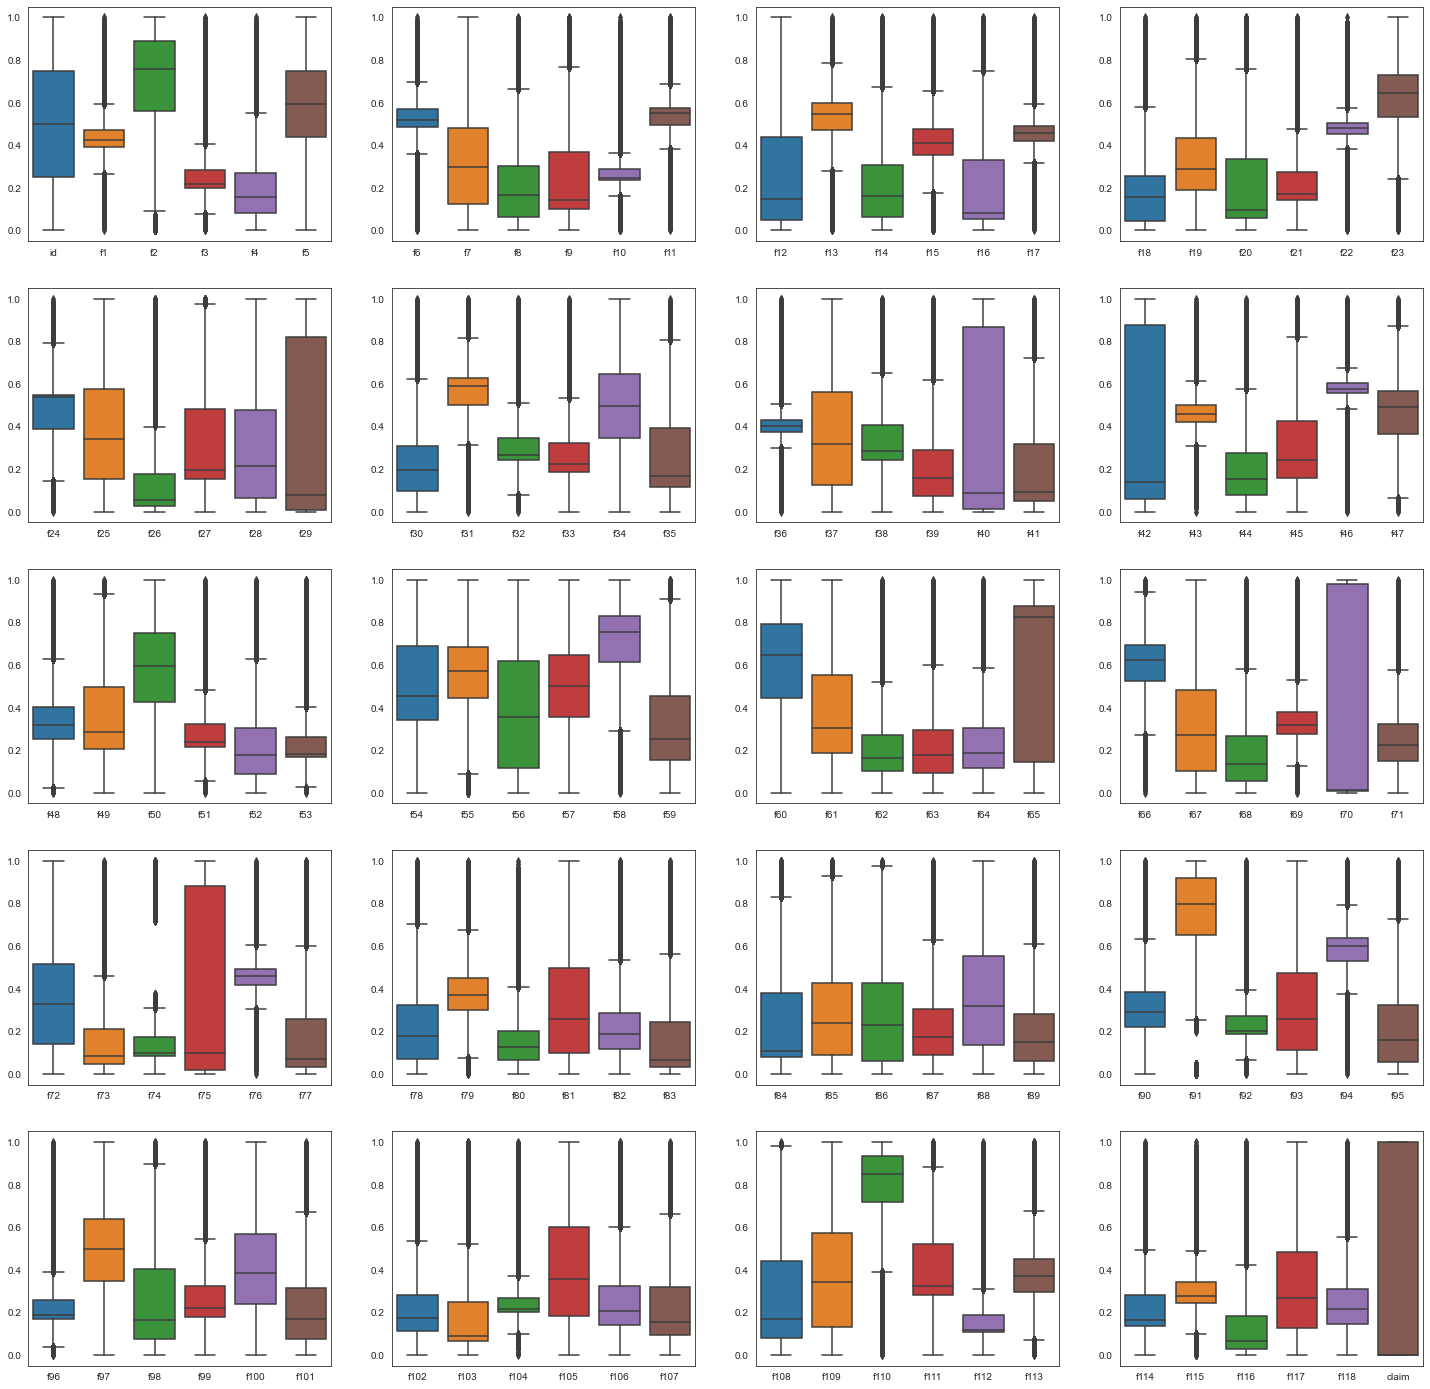

In [13]:
#做你能想到可以了解資料的圖表 (heatmap、kdeplot 等等)
#plt.subplot   (normalize box plot)
NROW=5
NCOL=4

j = 0
sns.set_style('white')
fig, ax = plt.subplots(NROW, NCOL, figsize = (25,25))
plot_df = df.reset_index()

plot_df = (plot_df - plot_df.min())/(plot_df.max()-plot_df.min())
for row in range(NROW):
    for col in range(NCOL):
        sns.boxplot(data = plot_df.iloc[:,j:j+6], ax = ax[row, col])
        j = j + 6
# 請問你寫 plot_df.describe(include='all') 是甚麼意思 ?????????????????????????????????????????????????????????????????????????? 
# palette 調色盤

<AxesSubplot:>

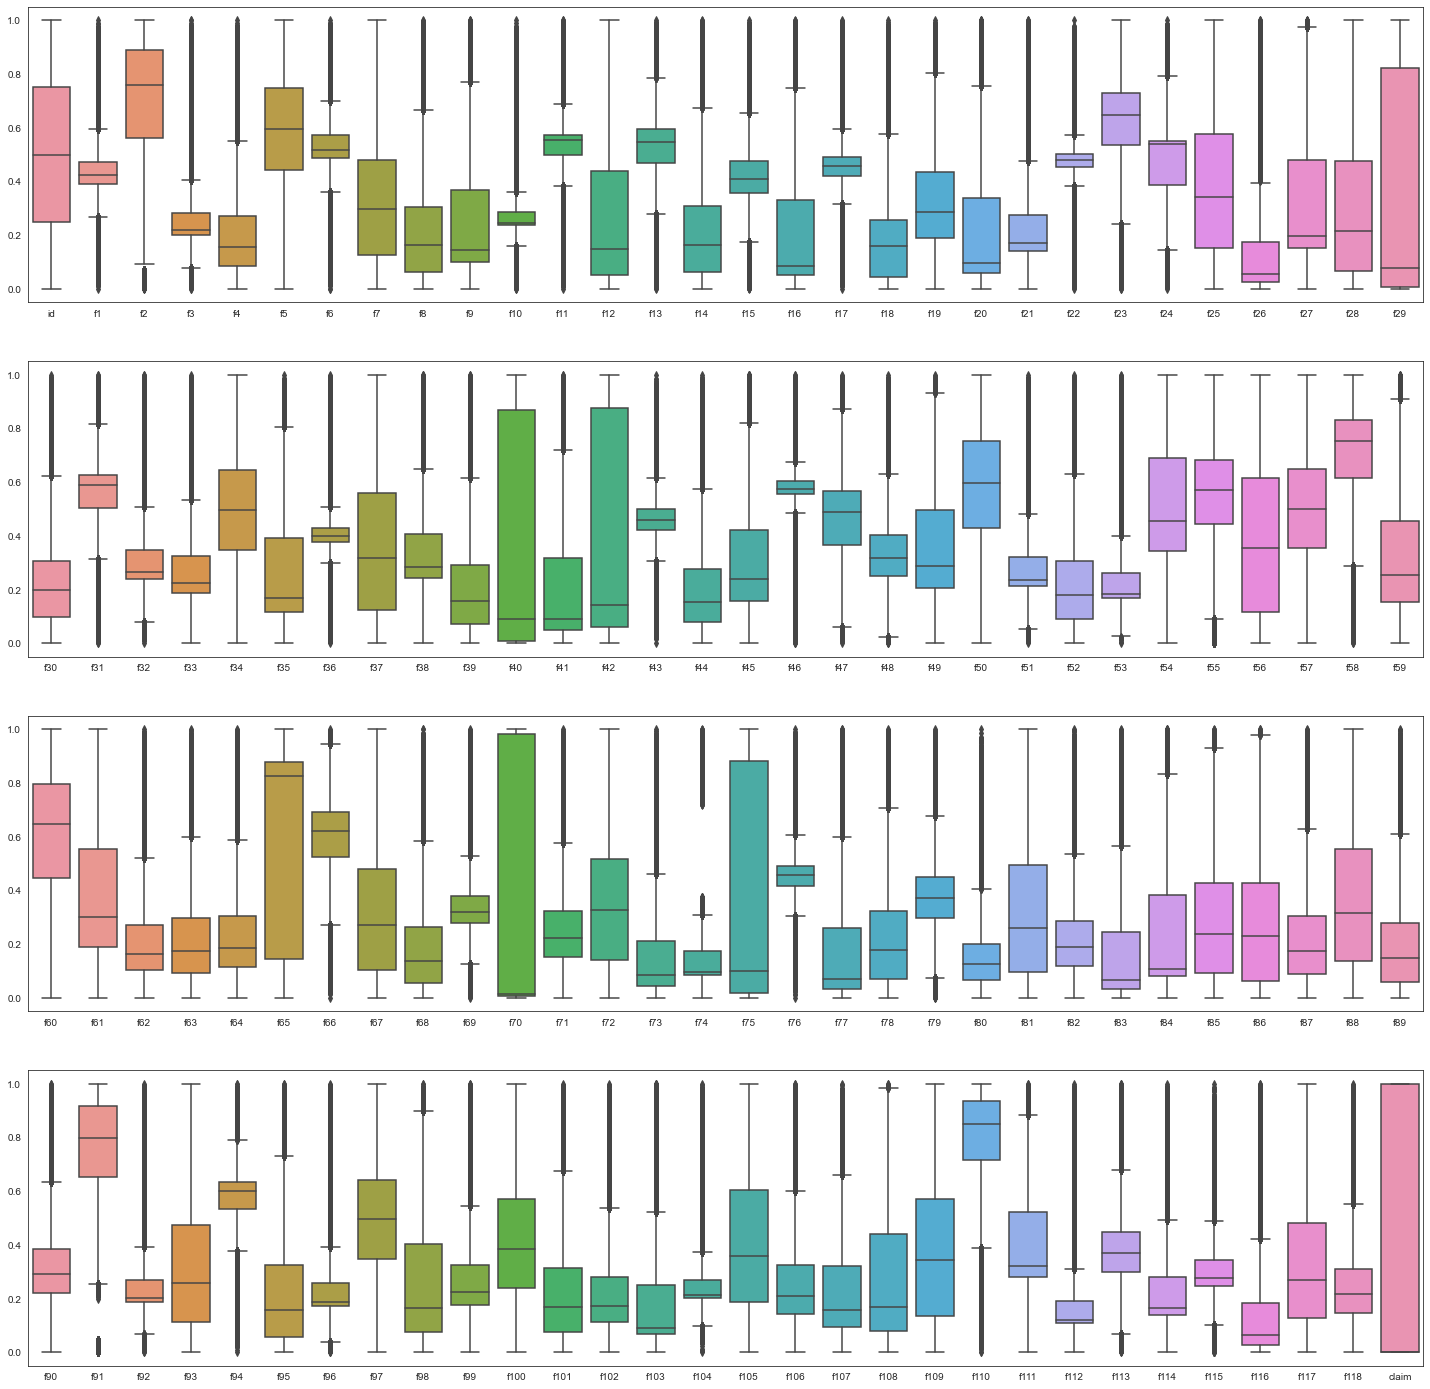

In [14]:
#(normalize box plot)

fig, ax = plt.subplots(4,1, figsize=(25,25))

sns.boxplot(data=plot_df.iloc[:,:30], ax=ax[0])
sns.boxplot(data=plot_df.iloc[:,30:60], ax=ax[1])
sns.boxplot(data=plot_df.iloc[:,60:90], ax=ax[2])
sns.boxplot(data=plot_df.iloc[:,90:], ax=ax[3])

<AxesSubplot:>

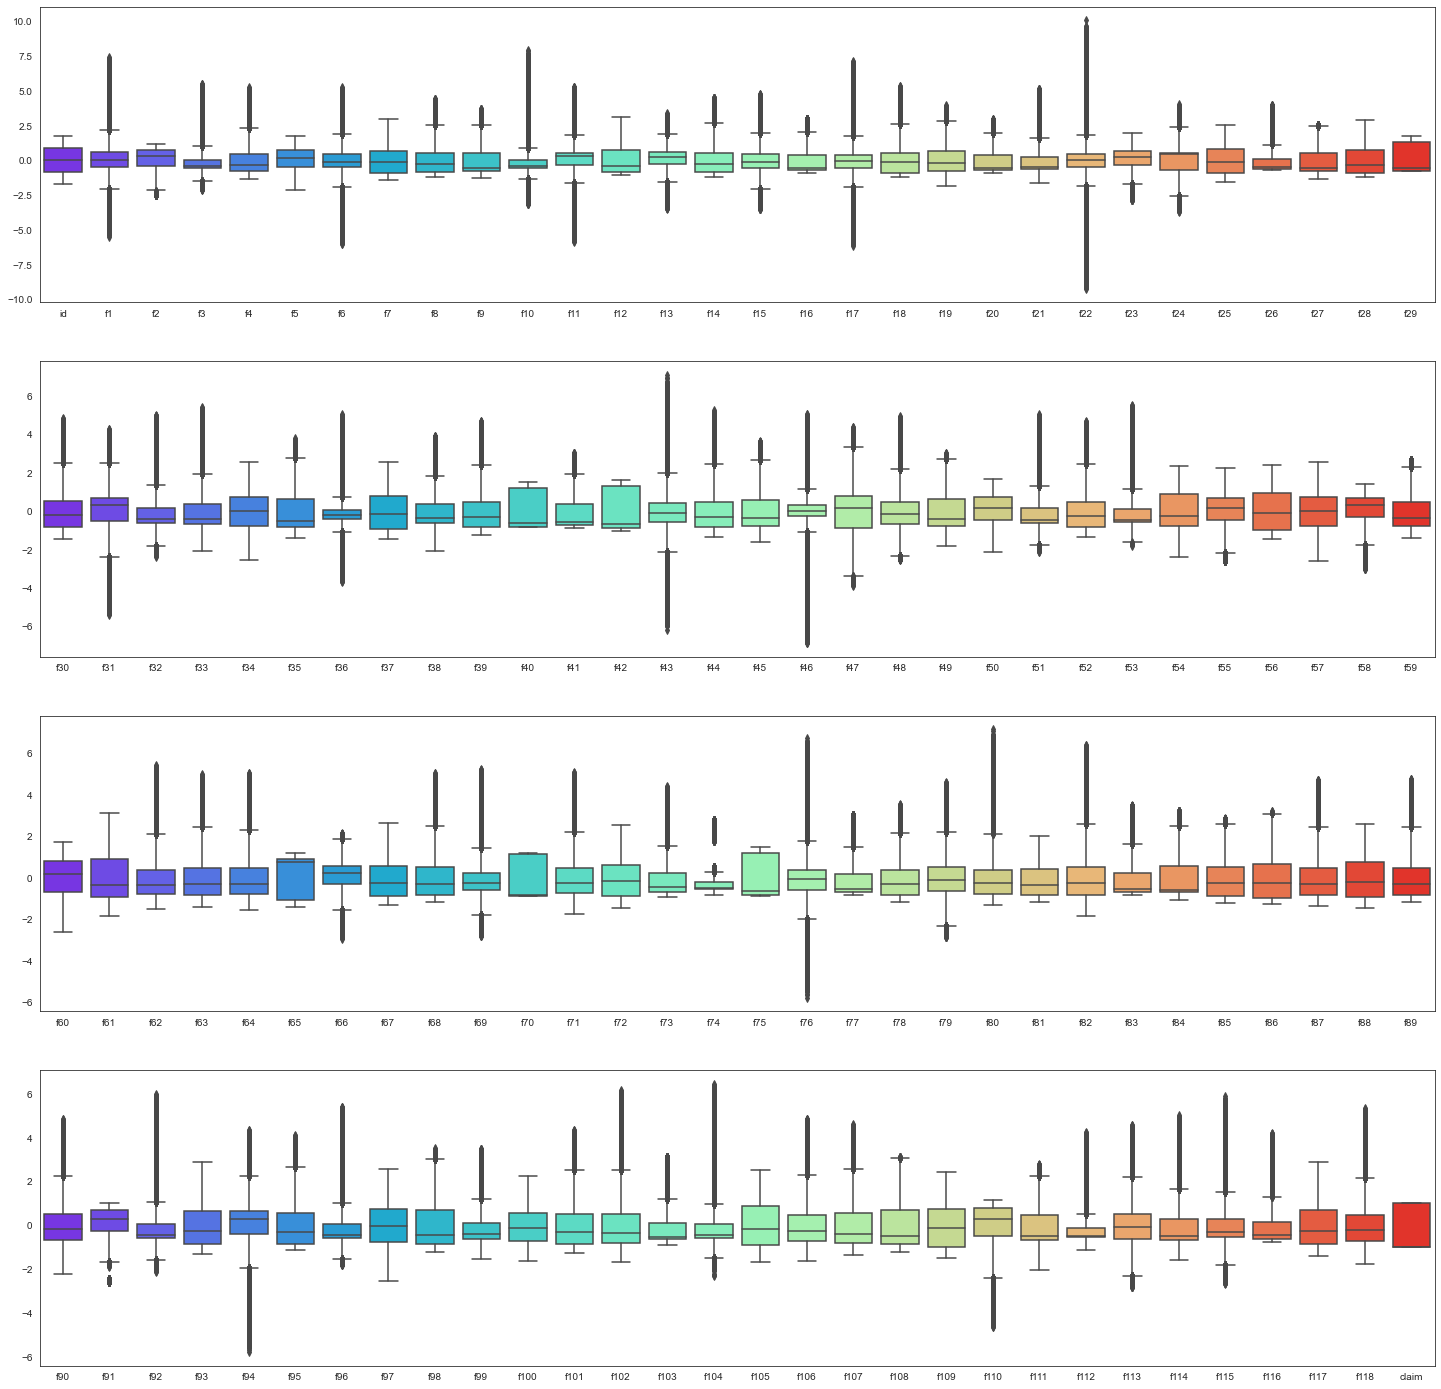

In [15]:
#(zscore box plot)

plot_df1 = df.reset_index()
plot_df1 = (plot_df1-plot_df1.mean())/(plot_df1.std())

fig, ax = plt.subplots(4,1, figsize=(25,25))

sns.boxplot(data=plot_df1.iloc[:,:30], ax=ax[0], palette = 'rainbow')
sns.boxplot(data=plot_df1.iloc[:,30:60], ax=ax[1], palette = 'rainbow')
sns.boxplot(data=plot_df1.iloc[:,60:90], ax=ax[2], palette = 'rainbow')
sns.boxplot(data=plot_df1.iloc[:,90:], ax=ax[3], palette = 'rainbow')
# palette 調色盤

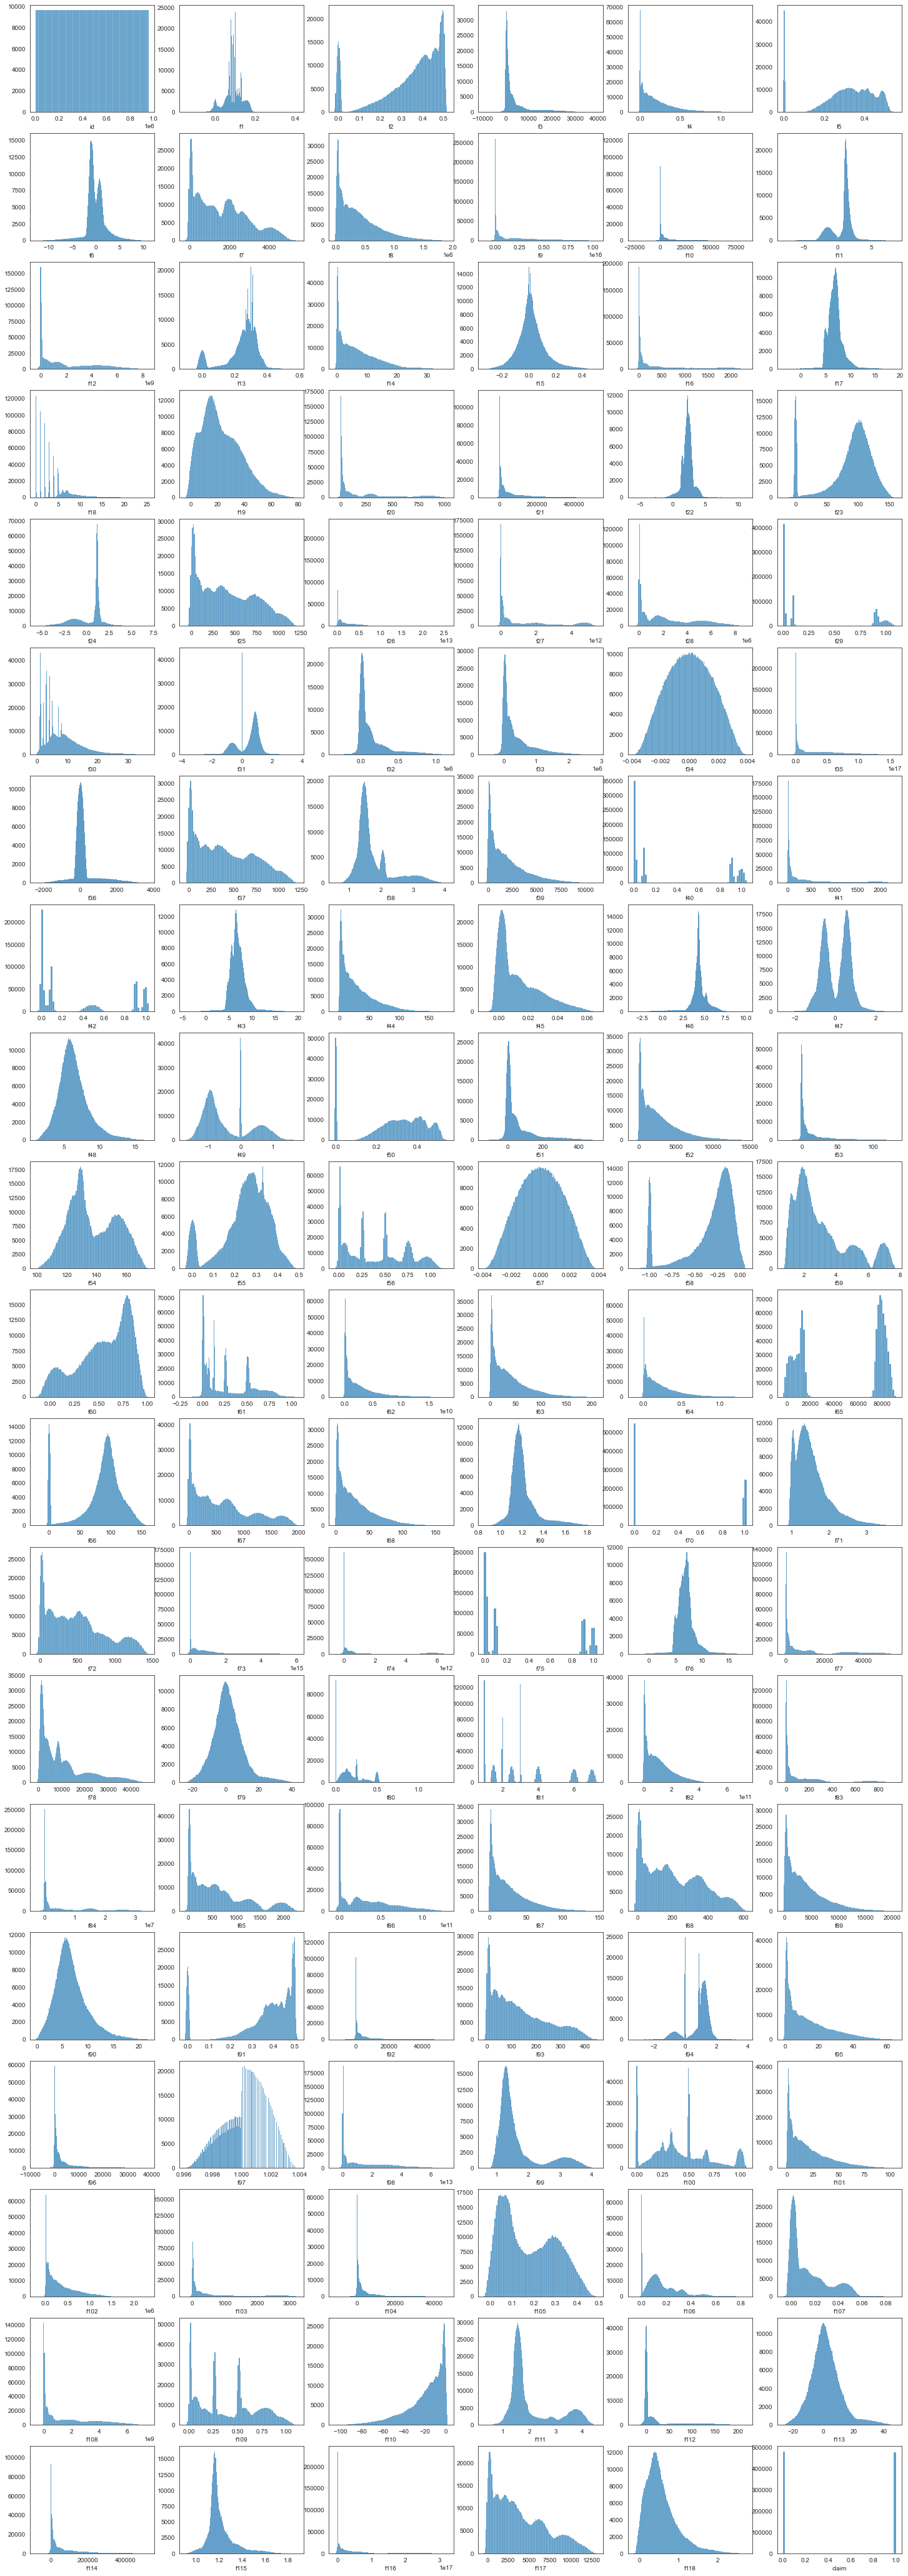

In [16]:
#做你能想到可以了解資料的圖表 (heatmap、kdeplot 等等)

NROW=20
NCOL=6

i = 0
sns.set_style('white')
fig, ax = plt.subplots(NROW, NCOL, figsize = (25,75))
plot_df = df.reset_index()
for row in range(NROW):
    for col in range(NCOL):
        sns.histplot(data = plot_df.iloc[:,i], ax = ax[row, col], palette = 'bone_r').set(ylabel = '')
        i = i + 1
# palette 調色盤

- **決定要怎麼補缺失值**

```
f1:mean()
f2:median()
f3:median()
f4:median()
f5:median()
f6:mean()
f7:median()
f8:median()
f9:mode()
f10:mode()
f11:median()
f12:median()
f13:median()
f14:median()
f15:mean()
f16:mode()
f17:mean()
f18:median()
f19:mean()
f20:mode()
f21:median()
f22:mean()
f23:median()
f24:median()
f25:median()
f26:median()
f27:mode()
f28:median()
f29:mode()
f30:median()
f31:median()
f32:median()
f33:median()
f34:mean()
f35:mode()
f36:median()
f37:median()
f38:median()
f39:median()
f40:mode()
f41:mode()
f42:mode()
f43:mean()
f44:median()
f45:median()
f46:mean()
f47:mode()
f48:mean()
f49:median()
f50:median()
f51:median()
f52:median()
f53:median()
f54:median()
f55:median()
f56:median()
f57:mean()
f58:median()
f59:median()
f60:median()
f61:median()
f62:median()
f63:median()
f64:median()
f65:mode()
f66:median()
f67:median()
f68:median()
f69:mean()
f70:mode()
f71:median()
f72:median()
f73:mode()
f74:mode()
f75:mode()
f76:mean()
f77:mode()
f78:median()
f79:mean()
f80:mode()
f81:mode()
f82:median()
f83:mode()
f84:mode()
f85:median()
f86:mode()
f87:median()
f88:median()
f89:median()
f90:mean()
f91:median()
f92:mode()
f93:median()
f94:median()
f95:median()
f96:median()
f97:median()
f98:mode()
f99:median()
f100:median()
f101:median()
f102:median()
f103:median()
f104:median()
f105:median()
f106:median()
f107:median()
f108:mode()
f109:median()
f110:median()
f111:median()
f112:median()
f113:mean()
f114:median()
f115:median()
f116:mode()
f117:median()
f118:median()
```

In [16]:
df_ = pd.DataFrame()    # 創空 data frame

df_['f1']=df['f1'].fillna(value=df["f1"].mean())
df_['f2']=df['f2'].fillna(value=df["f2"].median())
df_['f3']=df['f3'].fillna(value=df["f3"].median())
df_['f4']=df['f4'].fillna(value=df["f4"].median())
df_['f5']=df['f5'].fillna(value=df["f5"].median())
df_['f6']=df['f6'].fillna(value=df["f6"].mean())
df_['f7']=df['f7'].fillna(value=df["f7"].median())
df_['f8']=df['f8'].fillna(value=df["f8"].median())
df_['f9']=df['f9'].fillna(value=df["f9"].mode()[0])
df_['f10']=df['f10'].fillna(value=df["f10"].mode()[0])
df_['f11']=df['f11'].fillna(value=df["f11"].median())
df_['f12']=df['f12'].fillna(value=df["f12"].median())
df_['f13']=df['f13'].fillna(value=df["f13"].median())
df_['f14']=df['f14'].fillna(value=df["f14"].median())
df_['f15']=df['f15'].fillna(value=df["f15"].mean())
df_['f16']=df['f16'].fillna(value=df["f16"].mode()[0])
df_['f17']=df['f17'].fillna(value=df["f17"].mean())
df_['f18']=df['f18'].fillna(value=df["f18"].median())
df_['f19']=df['f19'].fillna(value=df["f19"].mean())
df_['f20']=df['f20'].fillna(value=df["f20"].mode()[0])
df_['f21']=df['f21'].fillna(value=df["f21"].median())
df_['f22']=df['f22'].fillna(value=df["f22"].mean())
df_['f23']=df['f23'].fillna(value=df["f23"].median())
df_['f24']=df['f24'].fillna(value=df["f24"].median())
df_['f25']=df['f25'].fillna(value=df["f25"].median())
df_['f26']=df['f26'].fillna(value=df["f26"].median())
df_['f27']=df['f27'].fillna(value=df["f27"].mode()[0])
df_['f28']=df['f28'].fillna(value=df["f28"].median())
df_['f29']=df['f29'].fillna(value=df["f29"].mode()[0])
df_['f30']=df['f30'].fillna(value=df["f30"].median())
df_['f31']=df['f31'].fillna(value=df["f31"].median())
df_['f32']=df['f32'].fillna(value=df["f32"].median())
df_['f33']=df['f33'].fillna(value=df["f33"].median())
df_['f34']=df['f34'].fillna(value=df["f34"].mean())
df_['f35']=df['f35'].fillna(value=df["f35"].mode()[0])
df_['f36']=df['f36'].fillna(value=df["f36"].median())
df_['f37']=df['f37'].fillna(value=df["f37"].median())
df_['f38']=df['f38'].fillna(value=df["f38"].median())
df_['f39']=df['f39'].fillna(value=df["f39"].median())
df_['f40']=df['f40'].fillna(value=df["f40"].mode()[0])
df_['f41']=df['f41'].fillna(value=df["f41"].mode()[0])
df_['f42']=df['f42'].fillna(value=df["f42"].mode()[0])
df_['f43']=df['f43'].fillna(value=df["f43"].mean())
df_['f44']=df['f44'].fillna(value=df["f44"].median())
df_['f45']=df['f45'].fillna(value=df["f45"].median())
df_['f46']=df['f46'].fillna(value=df["f46"].mean())
df_['f47']=df['f47'].fillna(value=df["f47"].mode()[0])
df_['f48']=df['f48'].fillna(value=df["f48"].mean())
df_['f49']=df['f49'].fillna(value=df["f49"].median())
df_['f50']=df['f50'].fillna(value=df["f50"].median())
df_['f51']=df['f51'].fillna(value=df["f51"].median())
df_['f52']=df['f52'].fillna(value=df["f52"].median())
df_['f53']=df['f53'].fillna(value=df["f53"].median())
df_['f54']=df['f54'].fillna(value=df["f54"].median())
df_['f55']=df['f55'].fillna(value=df["f55"].median())
df_['f56']=df['f56'].fillna(value=df["f56"].median())
df_['f57']=df['f57'].fillna(value=df["f57"].mean())
df_['f58']=df['f58'].fillna(value=df["f58"].median())
df_['f59']=df['f59'].fillna(value=df["f59"].median())
df_['f60']=df['f60'].fillna(value=df["f60"].median())
df_['f61']=df['f61'].fillna(value=df["f61"].median())
df_['f62']=df['f62'].fillna(value=df["f62"].median())
df_['f63']=df['f63'].fillna(value=df["f63"].median())
df_['f64']=df['f64'].fillna(value=df["f64"].median())
df_['f65']=df['f65'].fillna(value=df["f65"].mode()[0])
df_['f66']=df['f66'].fillna(value=df["f66"].median())
df_['f67']=df['f67'].fillna(value=df["f67"].median())
df_['f68']=df['f68'].fillna(value=df["f68"].median())
df_['f69']=df['f69'].fillna(value=df["f69"].mean())
df_['f70']=df['f70'].fillna(value=df["f70"].mode()[0])
df_['f71']=df['f71'].fillna(value=df["f71"].median())
df_['f72']=df['f72'].fillna(value=df["f72"].median())
df_['f73']=df['f73'].fillna(value=df["f73"].mode()[0])
df_['f74']=df['f74'].fillna(value=df["f74"].mode()[0])
df_['f75']=df['f75'].fillna(value=df["f75"].mode()[0])
df_['f76']=df['f76'].fillna(value=df["f76"].mode()[0])
df_['f77']=df['f77'].fillna(value=df["f77"].mode()[0])
df_['f78']=df['f78'].fillna(value=df["f78"].median())
df_['f79']=df['f79'].fillna(value=df["f79"].mean())
df_['f80']=df['f80'].fillna(value=df["f80"].mode()[0])
df_['f81']=df['f81'].fillna(value=df["f81"].mode()[0])
df_['f82']=df['f82'].fillna(value=df["f82"].median())
df_['f83']=df['f83'].fillna(value=df["f83"].mode()[0])
df_['f84']=df['f84'].fillna(value=df["f84"].mode()[0])
df_['f85']=df['f85'].fillna(value=df["f85"].median())
df_['f86']=df['f86'].fillna(value=df["f86"].mode()[0])
df_['f87']=df['f87'].fillna(value=df["f87"].median())
df_['f88']=df['f88'].fillna(value=df["f88"].median())
df_['f89']=df['f89'].fillna(value=df["f89"].median())
df_['f90']=df['f90'].fillna(value=df["f90"].mode()[0])
df_['f91']=df['f91'].fillna(value=df["f91"].median())
df_['f92']=df['f92'].fillna(value=df["f92"].mode()[0])
df_['f93']=df['f93'].fillna(value=df["f93"].median())
df_['f94']=df['f94'].fillna(value=df["f94"].median())
df_['f95']=df['f95'].fillna(value=df["f95"].median())
df_['f96']=df['f96'].fillna(value=df["f96"].median())
df_['f97']=df['f97'].fillna(value=df["f97"].median())
df_['f98']=df['f98'].fillna(value=df["f98"].mode()[0])
df_['f99']=df['f99'].fillna(value=df["f99"].median())
df_['f100']=df['f100'].fillna(value=df["f100"].median())
df_['f101']=df['f101'].fillna(value=df["f101"].median())
df_['f102']=df['f102'].fillna(value=df["f102"].median())
df_['f103']=df['f103'].fillna(value=df["f103"].median())
df_['f104']=df['f104'].fillna(value=df["f104"].median())
df_['f105']=df['f105'].fillna(value=df["f105"].median())
df_['f106']=df['f106'].fillna(value=df["f106"].median())
df_['f107']=df['f107'].fillna(value=df["f107"].median())
df_['f108']=df['f108'].fillna(value=df["f108"].mode()[0])
df_['f109']=df['f109'].fillna(value=df["f109"].median())
df_['f110']=df['f110'].fillna(value=df["f110"].median())
df_['f111']=df['f111'].fillna(value=df["f111"].median())
df_['f112']=df['f112'].fillna(value=df["f112"].median())
df_['f113']=df['f113'].fillna(value=df["f113"].mean())
df_['f114']=df['f114'].fillna(value=df["f114"].median())
df_['f115']=df['f115'].fillna(value=df["f115"].median())
df_['f116']=df['f116'].fillna(value=df["f116"].mode()[0])
df_['f117']=df['f117'].fillna(value=df["f117"].median())
df_['f118']=df['f118'].fillna(value=df["f118"].median())


In [17]:
# 還有缺失值嗎，手動補值

df_.isnull().sum().sum()                                         # 手動補值                                   (第四種)

0

In [18]:
#df                                                              # 不做處理                                   (第一種)
df_0 = df.fillna(0)                                              # 補 0
na_mean_df = df.fillna(df.mean())                                # 用平均代替 NaN
na_median_df = df.fillna(df.median())                            # 用中位數代替 NaN                            (第三種)

na_number = pd.concat((df.loc[:,'f1':'f118'], df.isna().sum(axis=1), df['claim']), axis = 'columns')
na_number = na_number.rename(columns={ 0 :'Nanumber'})           # 用 NaN 數量                                (第二種)

df_add_na = pd.concat((df_.loc[:,'f1':'f118'], df.isna().sum(axis=1), df['claim']), axis = 'columns')         
df_add_na = df_add_na.rename(columns={ 0 :'Nanumber'})           # 用 NaN 數量 + 手動補值                      (第五種)


# df.mean() : 每列平均
# df.median() : 每列中位數
# df.loc[:, 'f1':'f118']  # 抓列

# df.isnull().sum().sum() # 還有缺失值嗎
# df.describe(include='all')  # 看統計量

 # df.to_csv("C:/Users/user/Desktop/..... .csv")

In [10]:
# df_add_na.to_csv("C:/Users/user/Desktop/df_add_na.csv")        #(第五種) # 用 NaN 數量 + 手動補值 

In [11]:
# df_.to_csv("C:/Users/user/Desktop/df_.csv")                    #(第四種) # 手動補值 

In [12]:
# na_number.to_csv("C:/Users/user/Desktop/na_number.csv")        #(第二種) # 用 NaN 數量 

In [13]:
# na_median_df.to_csv("C:/Users/user/Desktop/na_median_df.csv")  #(第三種) # 用中位數代替 NaN

# 輸出.csv

Index(['claim', 'Nanumber', 'f95', 'f8', 'f31', 'f35', 'f3', 'f48', 'f36',
       'f71'],
      dtype='object')


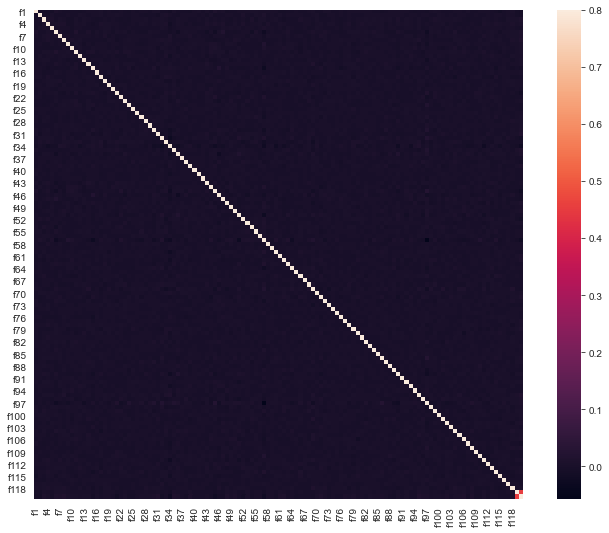

In [24]:
# correlation matrix

corrmat_ = na_number.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_, vmax=.8, square=True)

# 前10大相關變量

k = 10 #number of variables for heatmap
cols = corrmat_.nlargest(k, 'claim')['claim'].index
print(cols)

#'claim', 'Nanumber', 'f95', 'f8', 'f31', 'f35', 'f3', 'f48', 'f36','f71'

- **df . f116 == df [ ' f116 ' ]**
```
f116_ = df['f116'].fillna(value=df["f116"].mode()[0])    # pandas.core.series.Series
f116_.isnull().sum()                                     # 0
 
f116_ = df [ ' f116 ' ] . fillna ( value = df [ " f116 " ] . mode() [ 0 ] , inplace = True )  

**inplace = True : 直接換到原來的 data frame，所以不會存在 f116_ (f116_ = None)**
```



In [25]:
df["f116"].mode()    # 0    1.456400e+16
                     # dtype: float64

df["f116"].mode()[0] # 1.4564e+16

#沒加 [0] 會取不出來

1.4564e+16

```
def dist_mtx(X,Y):
    # X:(N1,d) array with rows xi
    # Y:(N2,d) array with rows yi
    X_col = X[:,np.newaxis,:]     #(N1,1,d)
    Y_row = Y[np.newaxis,:,:]     #(1,N2,d) axis=-1,最後一個軸
    diff = X_col - Y_row          #(N1,N2,d)
    dist = np.linalg.norm(diff,axis = -1) #把距離壓在d維上，原距離 (N,d)
    return dist
```